In [1]:
import numpy as np
import pandas as pd

In [2]:
pit_adv = pd.read_csv('minors_pitching_advanced.csv')
pit_profile = pd.read_csv('minors_pitching_profile.csv')
pit_std = pd.read_csv('minors_pitching_standard.csv')
pit_prom = pd.read_csv('promotedpitchers.csv')

bat_adv = pd.read_csv('minors_batting_advanced.csv')
bat_profile = pd.read_csv('minors_batting_profile.csv')
bat_std = pd.read_csv('minors_batting_standard.csv')
bat_prom = pd.read_csv('promotedbatters.csv')

In [3]:
## add promoted column to both batter and pitchers df

pit_adv['promoted_major'] = pit_adv.merge(pit_prom.assign(promoted_major=1),
                                          on=["Name", "Season"], how="left")["promoted_major"].fillna(0).astype(int)

pit_profile['promoted_major'] = pit_profile.merge(pit_prom.assign(promoted_major=1),
                                          on=["Name", "Season"], how="left")["promoted_major"].fillna(0).astype(int)


pit_std['promoted_major'] = pit_std.merge(pit_prom.assign(promoted_major=1),
                                          on=["Name", "Season"], how="left")["promoted_major"].fillna(0).astype(int)





bat_adv['promoted_major'] = bat_adv.merge(bat_prom.assign(promoted_major=1),
                                          on=["Name", "Season"], how="left")["promoted_major"].fillna(0).astype(int)

bat_profile['promoted_major'] = bat_profile.merge(bat_prom.assign(promoted_major=1),
                                          on=["Name", "Season"], how="left")["promoted_major"].fillna(0).astype(int)


bat_std['promoted_major'] = bat_std.merge(bat_prom.assign(promoted_major=1),
                                          on=["Name", "Season"], how="left")["promoted_major"].fillna(0).astype(int)


In [4]:
bat_adv.to_csv('final_batter_advanced.csv',  index=False)
bat_profile.to_csv('final_batter_profile.csv', index=False)
bat_std.to_csv('final_batter_standard.csv', index=False)

pit_adv.to_csv('final_pitcher_advanced.csv',  index=False)
pit_profile.to_csv('final_pitcher_profile.csv', index=False)
pit_std.to_csv('final_pitcher_standard.csv', index=False)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Predicted from 3 sheet individually

In [ ]:
pit_adv = pit_adv.drop(['Season', 'Name', 'Team', 'PlayerId'], axis = 1)
pit_profile = pit_profile.drop(['Season', 'Name', 'Team', 'PlayerId'], axis = 1)
pit_std = pit_std.drop(['Season', 'Name', 'Team', 'PlayerId', 'HLD'], axis = 1)

In [ ]:
pit_std = pit_std.fillna(pit_std.mean(numeric_only=True))
pit_profile = pit_profile.fillna(pit_profile.mean(numeric_only=True))
pit_adv = pit_adv.fillna(pit_adv.mean(numeric_only=True))

In [ ]:
pit_std = pit_std.loc[pit_std['Age'] <= 37, :]
X_pit_std = pit_std.drop('promoted_major', axis=1)
y_pit_std = pit_std.loc[:, 'promoted_major']

pit_profile = pit_profile.loc[pit_profile['Age'] <= 37, :]
X_pit_profile = pit_profile.drop('promoted_major', axis=1)
y_pit_profile = pit_profile.loc[:, 'promoted_major']

pit_adv = pit_adv.loc[pit_adv['Age'] <= 37, :]
X_pit_adv = pit_adv.drop('promoted_major', axis=1)
y_pit_adv = pit_adv.loc[:, 'promoted_major']

In [ ]:
X_pit_std_train, X_pit_std_test, y_pit_std_train, y_pit_std_test = train_test_split(X_pit_std, y_pit_std,
                                                                                    test_size = 0.2,
                                                                                    stratify = pit_std['promoted_major'],
                                                                                    random_state = 42)

X_pit_profile_train, X_pit_profile_test, y_pit_profile_train, y_pit_profile_test = train_test_split(X_pit_profile, y_pit_profile,
                                                                                                    test_size = 0.2,
                                                                                                    stratify = pit_profile['promoted_major'],
                                                                                                    random_state = 42)

X_pit_adv_train, X_pit_adv_test, y_pit_adv_train, y_pit_adv_test = train_test_split(X_pit_adv, y_pit_adv,
                                                                                    test_size = 0.2,
                                                                                    stratify = pit_adv['promoted_major'],
                                                                                    random_state = 42)

In [ ]:
X_pit_std_train_cate = X_pit_std_train.select_dtypes(object)
X_pit_std_train_cate_final = pd.get_dummies(X_pit_std_train_cate, drop_first = False, dtype = int)

X_pit_std_test_cate = X_pit_std_test.select_dtypes(object)
X_pit_std_test_cate_final = pd.get_dummies(X_pit_std_test_cate, drop_first = False, dtype = int)

#-----------------------------------------------------------------------------------------------------
X_pit_profile_train_cate = X_pit_profile_train.select_dtypes(object)
X_pit_profile_train_cate_final = pd.get_dummies(X_pit_profile_train_cate, drop_first = False, dtype = int)

X_pit_profile_test_cate = X_pit_profile_test.select_dtypes(object)
X_pit_profile_test_cate_final = pd.get_dummies(X_pit_profile_test_cate, drop_first = False, dtype = int)

#------------------------------------------------------------------------------------------------
X_pit_adv_train_cate = X_pit_adv_train.select_dtypes(object)
X_pit_adv_train_cate_final = pd.get_dummies(X_pit_adv_train_cate, drop_first = False, dtype = int)

X_pit_adv_test_cate = X_pit_adv_test.select_dtypes(object)
X_pit_adv_test_cate_final = pd.get_dummies(X_pit_adv_test_cate, drop_first = False, dtype = int)

In [ ]:
scaler_std = StandardScaler()
scaler_pro = StandardScaler()
scaler_adv = StandardScaler()
#---------------------------------------------------------------------------------------------------

X_pit_std_train_num = X_pit_std_train.select_dtypes(include=[np.number])
X_pit_std_test_num = X_pit_std_test.select_dtypes(include=[np.number])

X_pit_std_train_num_scal = scaler_std.fit_transform(X_pit_std_train_num)
X_pit_std_test_num_scal = scaler_std.transform(X_pit_std_test_num)

X_pit_std_train_num_final = pd.DataFrame(data = X_pit_std_train_num_scal, 
                                     columns = X_pit_std_train_num.columns.tolist(), 
                                     index = X_pit_std_train_num.index)

X_pit_std_test_num_final = pd.DataFrame(data = X_pit_std_test_num_scal, 
                                     columns = X_pit_std_test_num.columns.tolist(), 
                                     index = X_pit_std_test_num.index)
#-----------------------------------------------------------------------------------------------------

X_pit_profile_train_num = X_pit_profile_train.select_dtypes(include=[np.number])
X_pit_profile_test_num = X_pit_profile_test.select_dtypes(include=[np.number])

X_pit_profile_train_num_scal = scaler_pro.fit_transform(X_pit_profile_train_num)
X_pit_profile_test_num_scal = scaler_pro.transform(X_pit_profile_test_num)

X_pit_profile_train_num_final = pd.DataFrame(data = X_pit_profile_train_num_scal, 
                                     columns = X_pit_profile_train_num.columns.tolist(), 
                                     index = X_pit_profile_train_num.index)

X_pit_profile_test_num_final = pd.DataFrame(data = X_pit_profile_test_num_scal, 
                                     columns = X_pit_profile_test_num.columns.tolist(), 
                                     index = X_pit_profile_test_num.index)

#------------------------------------------------------------------------------------------------
X_pit_adv_train_num = X_pit_adv_train.select_dtypes(include=[np.number])
X_pit_adv_test_num = X_pit_adv_test.select_dtypes(include=[np.number])

X_pit_adv_train_num_scal = scaler_adv.fit_transform(X_pit_adv_train_num)
X_pit_adv_test_num_scal = scaler_adv.transform(X_pit_adv_test_num)

X_pit_adv_train_num_final = pd.DataFrame(data = X_pit_adv_train_num_scal, 
                                     columns = X_pit_adv_train_num.columns.tolist(), 
                                     index = X_pit_adv_train_num.index)

X_pit_adv_test_num_final = pd.DataFrame(data = X_pit_adv_test_num_scal, 
                                     columns = X_pit_adv_test_num.columns.tolist(), 
                                     index = X_pit_adv_test_num.index)

In [ ]:
X_pit_std_train_final = pd.merge(X_pit_std_train_cate_final,
                                 X_pit_std_train_num_final, 
                                 right_index = True, left_index = True )

X_pit_std_test_final = pd.merge(X_pit_std_test_cate_final,
                                 X_pit_std_test_num_final, 
                                 right_index = True, left_index = True )

#-------------------------------------------------------

X_pit_pro_train_final = pd.merge(X_pit_profile_train_cate_final,
                                 X_pit_profile_train_num_final, 
                                 right_index = True, left_index = True )

X_pit_pro_test_final = pd.merge(X_pit_profile_test_cate_final,
                                 X_pit_profile_test_num_final, 
                                 right_index = True, left_index = True )

#-------------------------------------------------------

X_pit_adv_train_final = pd.merge(X_pit_adv_train_cate_final,
                                 X_pit_adv_train_num_final, 
                                 right_index = True, left_index = True )

X_pit_adv_test_final = pd.merge(X_pit_adv_test_cate_final,
                                 X_pit_adv_test_num_final, 
                                 right_index = True, left_index = True )

In [ ]:
## standard
from sklearn.neural_network import MLPClassifier


mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), 
                          activation='relu', 
                          solver='adam', 
                          max_iter=500, 
                          random_state=42)

# Fit the model
mlp_model.fit(X_pit_std_train_final, y_pit_std_train)

# Predict
y_pred_std = mlp_model.predict(X_pit_std_test_final)
y_pred_std_prob = mlp_model.predict_proba(X_pit_std_test_final)

y_pred_std_train = mlp_model.predict(X_pit_std_train_final)
y_pred_std_prob_train = mlp_model.predict_proba(X_pit_std_train_final)

In [ ]:
# profile
mlp_model_pro = MLPClassifier(hidden_layer_sizes=(128, 64, 32), 
                          activation='relu', 
                          solver='adam', 
                          max_iter=500, 
                          random_state=42)

# Fit the model
mlp_model_pro.fit(X_pit_pro_train_final, y_pit_profile_train)

# Predict
y_pred_pro = mlp_model_pro.predict(X_pit_pro_test_final)
y_pred_pro_prob = mlp_model_pro.predict_proba(X_pit_pro_test_final)

y_pred_pro_train = mlp_model_pro.predict(X_pit_pro_train_final)
y_pred_pro_prob_train = mlp_model_pro.predict_proba(X_pit_pro_train_final)

In [ ]:
#advanced
mlp_model_adv = MLPClassifier(hidden_layer_sizes=(128, 64, 32), 
                          activation='relu', 
                          solver='adam', 
                          max_iter=500, 
                          random_state=42)

# Fit the model
mlp_model_adv.fit(X_pit_adv_train_final, y_pit_adv_train)

# Predict
y_pred_adv = mlp_model_adv.predict(X_pit_adv_test_final)
y_pred_adv_prob = mlp_model_adv.predict_proba(X_pit_adv_test_final)

y_pred_adv_train = mlp_model_adv.predict(X_pit_adv_train_final)
y_pred_adv_train_prob = mlp_model_adv.predict_proba(X_pit_adv_train_final)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve

print('On Predicting Training Dataset')
print('Profile sheet accuracy score ', round(accuracy_score(y_pred_pro_train, y_pit_profile_train), 3))
print('Standard sheet accuracy score ', round(accuracy_score(y_pred_std_train, y_pit_std_train), 3))
print('Advanced sheet accuracy score ', round(accuracy_score(y_pred_adv_train, y_pit_adv_train), 3))

print()
print()
print()

print('On Predicting Testing Dataset')
print('Profile sheet accuracy score ', round(accuracy_score(y_pred_pro, y_pit_profile_test), 3))
print('Standard sheet accuracy score ', round(accuracy_score(y_pred_std, y_pit_std_test), 3))
print('Advanced sheet accuracy score ', round(accuracy_score(y_pred_adv, y_pit_adv_test), 3))


In [ ]:
fig, ax1 = plt.subplots(3,1, figsize = (12,20))
#ax1 = ax1.flatten()
pro_cm  = confusion_matrix(y_pit_profile_test, y_pred_pro)
pro_cm_display = ConfusionMatrixDisplay(confusion_matrix = pro_cm, display_labels = ['Did not Promote', 'Promoted'])
pro_cm_display.plot(ax = ax1[0])

std_cm  = confusion_matrix(y_pit_std_test, y_pred_std)
std_cm_display = ConfusionMatrixDisplay(confusion_matrix = std_cm, display_labels = ['Did not Promote', 'Promoted'])
std_cm_display.plot(ax = ax1[1])

adv_cm  = confusion_matrix(y_pit_adv_test, y_pred_adv)
adv_cm_display = ConfusionMatrixDisplay(confusion_matrix = adv_cm, display_labels = ['Did not Promote', 'Promoted'])
adv_cm_display.plot(ax = ax1[2])

In [ ]:
from sklearn.metrics import auc
fig, ax1 = plt.subplots(3,1, figsize = (12,20))
#ax1 = ax1.flatten()
project_list = [[y_pit_profile_test, y_pred_pro_prob[:, 1]],
                [y_pit_std_test, y_pred_std_prob[:, 1]],  
                [y_pit_adv_test, y_pred_adv_prob[:, 1]]]

for x in range(3):
    fpr, tpr, thresholds = roc_curve(project_list[x][0], project_list[x][1]) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    ax1[x].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    ax1[x].plot([0, 1], [0, 1], 'k--')
    ax1[x].set_xlim([0.0, 1.0])
    ax1[x].set_ylim([0.0, 1.05])
    ax1[x].set_xlabel('False Positive Rate')
    ax1[x].set_ylabel('True Positive Rate')
    ax1[x].set_title('ROC Curve')
    ax1[x].legend()


### Predicted with combined sheet using historical performance

In [14]:
# combining the same player to same row
df_player = pd.merge(pit_adv, pit_profile, on = ['Season', 'Name', 'Team', 'PlayerId', 'Level', 'promoted_major'], suffixes=('', '_drop'))
df_pit_final = pd.merge(df_player, pit_std,  on = ['Season', 'Name', 'Team', 'PlayerId','Level', 'promoted_major'], suffixes=('', '_drop'))

In [15]:
df_pit_final = df_pit_final.drop(['Age_drop', 'IP_drop', 'BABIP_drop', 'ERA_drop'], axis= 1)


In [16]:
#6 mins

features = ['HR/9','K%','BB%','K-BB%','ERA','FIP',
                 'E-F','WHIP','BABIP','HR/FB','GB/FB','SwStr%']

total_players = df_pit_final['PlayerId'].nunique()

df_pit_final = df_pit_final.sort_values(['PlayerId', 'Season'])
player_records = []

for player_id in df_pit_final['PlayerId'].unique():
    # Get all seasons
    player_data = df_pit_final[df_pit_final['PlayerId'] == player_id].sort_values('Season')

    # create base record
    player_record = {
        'PlayerId': player_id,
        'Name': player_data['Name'].iloc[0],
        'promoted_major': player_data['promoted_major'].iloc[0],
        'num_seasons': len(player_data)
    }

    # add each seasons data
    for i, (_, season) in enumerate(player_data.iterrows(), 1):
        # Add season number and metadata
        player_record[f'Season_{i}'] = season['Season']
        player_record[f'Age_{i}'] = season['Age']
        player_record[f'Level_{i}'] = season['Level']
        player_record[f'Team_{i}'] = season['Team']

        # add all performance features
        for feature in features:
            player_record[f'{feature}_{i}'] = season[feature]

    # add the record to the list
    player_records.append(player_record)

player_df = pd.DataFrame(player_records)



In [17]:
# 8 mins
max_seasons = player_df['num_seasons'].max()
def pad_seasons(row):
    num_seasons = row['num_seasons']
    
    if num_seasons < max_seasons:
        for i in range(num_seasons + 1, max_seasons + 1):
            row[f'Season_{i}'] = np.nan
            row[f'Age_{i}'] = np.nan
            row[f'Level_{i}'] = np.nan
            row[f'Team_{i}'] = np.nan
            for feature in features:
                row[f'{feature}_{i}'] = np.nan
    return row

player_df = player_df.apply(pad_seasons, axis=1)

In [18]:
player_df.to_csv('player_final.csv', index=False)


In [19]:
player_final_df = player_df
player_final_df = player_final_df.drop([ 'Name', 'PlayerId'], axis=1)
player_final_df = player_final_df.drop(columns=[col for col in player_final_df.columns if 'Team_' in col], axis=1)
player_final_df = player_final_df.drop(columns=[col for col in player_final_df.columns if 'Season_' in col], axis=1)

In [20]:
level_mapping = {"R": 1, "DSL": 2, "A-": 3, "A": 4,
                 "A+": 5, "AAA": 6, "CPX": 7, "AA": 8
                }

for col in player_final_df.columns:
    if 'Level_' in col:
        player_final_df[col] = player_final_df[col].map(level_mapping)


player_final_df = player_final_df.fillna(0)

In [21]:
# for combine sheet model




X_df_pit_final = player_final_df.drop('promoted_major', axis=1)
y_df_pit_final = player_final_df.loc[:, 'promoted_major']

X_com_train, X_com_test, y_com_train, y_com_test = train_test_split(X_df_pit_final, y_df_pit_final,
                                                                                    test_size = 0.2,
                                                                                    stratify = player_final_df['promoted_major'],
                                                                                    random_state = 42)




scaler_com = StandardScaler()

X_com_train_num = X_com_train.select_dtypes(include=[np.number])
X_com_test_num = X_com_test.select_dtypes(include=[np.number])

X_com_train_num_scal = scaler_com.fit_transform(X_com_train_num)
X_com_test_num_scal = scaler_com.transform(X_com_test_num)

X_com_train_final = pd.DataFrame(data = X_com_train_num_scal, 
                                     columns = X_com_train_num.columns.tolist(), 
                                     index = X_com_train_num.index)

X_com_test_final = pd.DataFrame(data = X_com_test_num_scal, 
                                     columns = X_com_test_num.columns.tolist(), 
                                     index = X_com_test_num.index)



from sklearn.neural_network import MLPClassifier


mlp_model_com = MLPClassifier(hidden_layer_sizes=(20,15), 
                          activation='relu', 
                          solver='adam', 
                          max_iter=500, 
                          random_state=42)

# Fit the model
mlp_model_com.fit(X_com_train_final, y_com_train)

# Predict
y_pred_com = mlp_model_com.predict(X_com_test_final)
y_pred_com_prob = mlp_model_com.predict_proba(X_com_test_final)

y_pred_com_train = mlp_model_com.predict(X_com_train_final)
y_pred_com_prob_train = mlp_model_com.predict_proba(X_com_train_final)

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, recall_score, precision_score

print('On Predicting Training Dataset')
print('Combine sheet accuracy score ', round(accuracy_score(y_pred_com_train, y_com_train), 3))
print('On Predicting Testing Dataset')
print('Combine sheet accuracy score ', round(accuracy_score(y_com_test, y_pred_com), 3))
print('Combine sheet recall score ', round(recall_score(y_com_test, y_pred_com), 3))
print('Combine sheet precision score ', round(precision_score(y_com_test, y_pred_com), 3))

On Predicting Training Dataset
Combine sheet accuracy score  0.991
On Predicting Testing Dataset
Combine sheet accuracy score  0.951
Combine sheet recall score  0.07
Combine sheet precision score  0.111


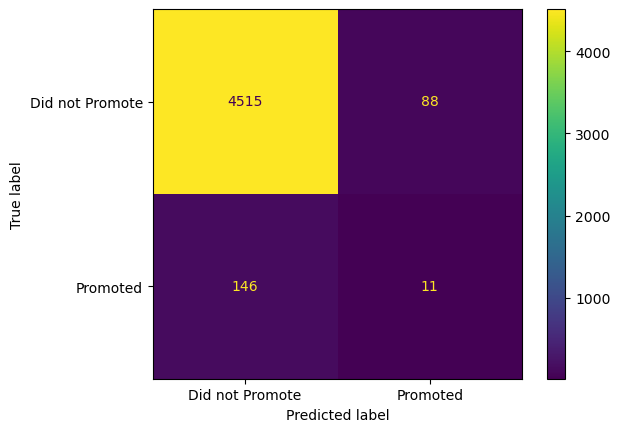

In [23]:
#fig, ax1 = plt.subplots(1,1, figsize = (12,20))
#ax1 = ax1.flatten()
pro_cm  = confusion_matrix(y_com_test, y_pred_com)
pro_cm_display = ConfusionMatrixDisplay(confusion_matrix = pro_cm, display_labels = ['Did not Promote', 'Promoted'])
pro_cm_display.plot()

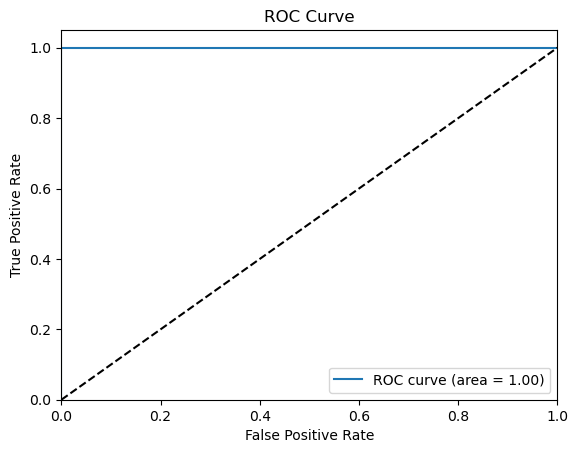

In [24]:
from sklearn.metrics import auc




fpr, tpr, thresholds = roc_curve(y_pred_com, y_pred_com_prob[:,1]) 
roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


In [99]:
# tune model  looking precision score
# average precision fail 0
# precision 0.182   2/11
# recall 0.25 1/4
# accuracy fai
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (40, 15, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.01, 0.001], 
    'learning_rate': ['constant', 'adaptive'],
}
mlp_com_tune = MLPClassifier(
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

grid_search = GridSearchCV(mlp_com_tune, param_grid, cv=8, n_jobs= -1, scoring = 'precision')
grid_search.fit(X_com_train_final, y_com_train)


print("Best parameters:", grid_search.best_params_)
print("Best cross-validation average precision :", grid_search.best_score_)

Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (40, 15, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation average precision : 0.1994047619047619


In [100]:
best_pram = grid_search.best_params_
mlp_com_final = MLPClassifier(**best_pram, max_iter=500,  early_stopping=True,
                              validation_fraction=0.1, random_state=42)

mlp_com_final.fit(X_com_train_final, y_com_train)

# Predict
y_pred_com_final = mlp_com_final.predict(X_com_test_final)
y_pred_com_prob_final = mlp_com_final.predict_proba(X_com_test_final)

y_pred_com_train_final = mlp_com_final.predict(X_com_train_final)
y_pred_com_prob_train_final = mlp_com_final.predict_proba(X_com_train_final)

In [101]:


print('On Predicting Training Dataset')
print('Combine sheet accuracy score ', round(accuracy_score(y_pred_com_train_final, y_com_train), 3))
print('On Predicting Testing Dataset')
print('Combine sheet accuracy score ', round(accuracy_score(y_com_test, y_pred_com_final), 3))
print('Combine sheet recall score ', round(recall_score(y_com_test, y_pred_com_final), 3))
print('Combine sheet precision score ', round(precision_score(y_com_test, y_pred_com_final), 3))

On Predicting Training Dataset
Combine sheet accuracy score  0.972
On Predicting Testing Dataset
Combine sheet accuracy score  0.966
Combine sheet recall score  0.013
Combine sheet precision score  0.182


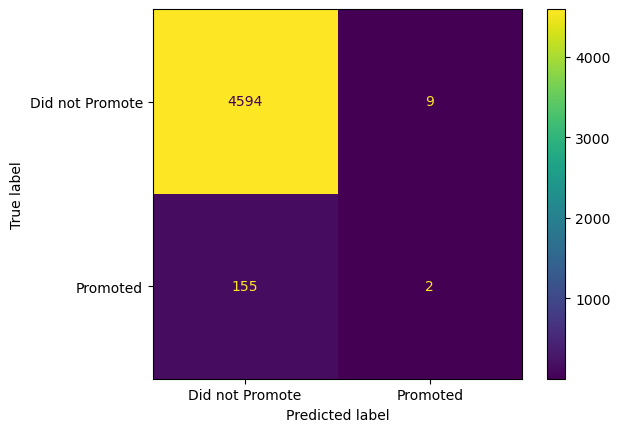

In [102]:
#fig, ax1 = plt.subplots(1,1, figsize = (12,20))
#ax1 = ax1.flatten()
pro_cm  = confusion_matrix(y_com_test, y_pred_com_final)
pro_cm_display = ConfusionMatrixDisplay(confusion_matrix = pro_cm, display_labels = ['Did not Promote', 'Promoted'])
pro_cm_display.plot()

In [103]:
y_com_test.value_counts()

promoted_major
0    4603
1     157
Name: count, dtype: int64

In [123]:
X_com_pred_eda = X_com_test_final
X_com_pred_eda['Prediction'] = y_pred_com_final
X_com_pred_eda['actual'] = y_com_test

In [127]:
X_com_pred_eda.to_csv('Result.csv')